# [WIP] PyPI Download Analysis
References:
https://packaging.python.org/en/latest/guides/analyzing-pypi-package-downloads/#public-dataset

In [1]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt

client = bigquery.Client()
dataset_ref = client.dataset("pypi", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [2]:
# List tables in each dataset
tables = list(client.list_tables(dataset))

for table in tables:  
    print(table.table_id)

distribution_metadata
file_downloads
simple_requests


In [3]:
# Used for data usage estimation
job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)

# Preview each table in the dataset

In [4]:
table_ref = dataset_ref.table("distribution_metadata")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  This is separate from the ipykernel package so we can avoid doing imports until


,metadata_version,name,version,summary,description,description_content_type,author,author_email,maintainer,maintainer_email,...,filename,size,path,python_version,packagetype,comment_text,has_signature,md5_digest,sha256_digest,blake2_256_digest
0,2.1,dependency-injector,4.10.0,Dependency injection framework for Python,.. figure:: https://raw.githubusercontent.com/...,None,ETS Labs,rmogilatov@gmail.com,Roman Mogylatov,rmogilatov@gmail.com,...,dependency_injector-4.10.0-cp27-cp27m-macosx_1...,499570,54/2c/bae7d13aba02e7eaa577a7171c073d15af3e2aa2...,cp27,bdist_wheel,None,False,8c78c7a36f8f9bb789ca3728bbbeb076,b9294f0496d75a3384f1d0dd5658379b6ff7806e251221...,542cbae7d13aba02e7eaa577a7171c073d15af3e2aa2a0...
1,2.1,dependency-injector,4.10.0,Dependency injection framework for Python,.. figure:: https://raw.githubusercontent.com/...,None,ETS Labs,rmogilatov@gmail.com,Roman Mogylatov,rmogilatov@gmail.com,...,dependency_injector-4.10.0-pp36-pypy36_pp73-ma...,409476,1e/67/252a2b658c1ebff0ea7db0c39141dc1de8526729...,pp36,bdist_wheel,None,False,10a367c40704cf3591b1aa0283c34c48,a298fd8f173a9efabd283c5cc3ecd7f57366b7437fc509...,1e67252a2b658c1ebff0ea7db0c39141dc1de852672906...
2,2.1,python-networkmanager,2.2,Easy communication with NetworkManager,None,None,Dennis Kaarsemaker,dennis@kaarsemaker.net,None,None,...,python_networkmanager-2.2-py3-none-any.whl,12404,87/7d/7ef5e3e1e8d994d76321238289ece3dcb7096bca...,py3,bdist_wheel,None,False,a75f6f49af69c39d02af418dc652b34a,0c5e9c3f872426637ba68609272e71a42992a4fc7c1cf4...,877d7ef5e3e1e8d994d76321238289ece3dcb7096bcad6...
3,2.1,pygeometa,0.6.0,pygeometa is a Python package to generate meta...,[![Build Status](https://github.com/geopython/...,text/markdown,Meteorological Service of Canada,tom.kralidis@canada.ca,Meteorological Service of Canada,tom.kralidis@canada.ca,...,pygeometa-0.6.0-py2.py3-none-any.whl,54370,19/6d/8b60ab0a69e7db1e538ca7deec0fbcaceeb26ed6...,py2.py3,bdist_wheel,None,False,942d453669950aa91987c1dcf20755bd,49a6f61d26e6a29e925ec1d7b783cc6d8da9013ec8730c...,196d8b60ab0a69e7db1e538ca7deec0fbcaceeb26ed617...
4,2.1,hammer-sh,0.0.8,A package containing useful methods for my mas...,# hammer_sh Python Package\n\n[![Version](http...,text/markdown,Sebastian Hammer,hammerse65450@th-nuernberg.de,None,None,...,hammer_sh-0.0.8.tar.gz,6438,18/7c/d98da6288340cd28fe859a76528652205d8a05c6...,source,sdist,None,False,caee7900f1fc4fe16107ff6e08e51846,76015d6fca3980fd1d602bb5bdf7b86823c6dbdfc48769...,187cd98da6288340cd28fe859a76528652205d8a05c626...


In [5]:
table_ref = dataset_ref.table("file_downloads")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,country_code,url,project,file,details,tls_protocol,tls_cipher
0,2021-01-16 16:37:29+00:00,FR,/packages/ca/95/51ddd56f7599044e490762ed61fb35...,a8,"{'filename': 'a8-0.3.zip', 'project': 'a8', 'v...",None,TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
1,2021-01-16 14:58:10+00:00,FR,/packages/05/53/27e210b9ddbebeb8c77255de0fa92c...,ach,"{'filename': 'ach-0.1.1.tar.gz', 'project': 'a...",None,TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
2,2021-01-16 14:38:23+00:00,US,/packages/c3/f2/6c5061a3e851b0330c5c89c34a54f2...,aclass,"{'filename': 'aclass-0.0.8.tar.gz', 'project':...",None,TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
3,2021-01-16 14:38:23+00:00,US,/packages/bb/11/5d5d20f331dfa59de76790e1ed75c1...,aclass,"{'filename': 'aclass-0.0.9.tar.gz', 'project':...",None,TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
4,2021-01-16 15:36:30+00:00,FR,/packages/62/5c/09102f7a712ad863a4980381fcc17b...,aaa2-1-1,"{'filename': 'aaa2.1.1-2.1.1.tar.gz', 'project...",None,TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256


In [6]:
table_ref = dataset_ref.table("simple_requests")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,country_code,url,project,details,tls_protocol,tls_cipher
0,2021-01-16 22:24:51+00:00,US,/simple/addons/,addons,"{'installer': {'name': 'pip', 'version': '7.1....",TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
1,2021-01-16 20:48:54+00:00,IL,/simple/addons/,addons,"{'installer': {'name': 'pip', 'version': '7.1....",TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
2,2021-01-16 20:37:49+00:00,SG,/simple/addons/,addons,"{'installer': {'name': 'pip', 'version': '7.1....",TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
3,2021-01-16 20:36:04+00:00,CA,/simple/addons/,addons,"{'installer': {'name': 'pip', 'version': '7.1....",TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256
4,2021-01-16 21:01:16+00:00,US,/simple/addons/,addons,"{'installer': {'name': 'pip', 'version': '9.0....",TLSv1.2,ECDHE-RSA-AES128-GCM-SHA256


# Query time !


Find the most downloaded packages today.

In [7]:
query = """
        SELECT project, count(*) AS download_counts
        FROM `bigquery-public-data.pypi.file_downloads`
        WHERE DATE(timestamp) = CURRENT_DATE()
        GROUP BY project
        """

test_query_job = client.query(query, job_config=job_config) # Dry run
print(test_query_job.total_bytes_processed)

11442531488


In [8]:
actual_query_job = client.query(query)
packages_today = actual_query_job.to_dataframe()
print(f"Used {actual_query_job.total_bytes_billed} bytes")
packages_today.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


Used 11443109888 bytes


,project,download_counts
0,angrop,343
1,analysiscommits,186
2,annotell-base-clients,85
3,agraffe,39
4,adafruit-blinka,1423


In [9]:
packages_today = packages_today.sort_values(by="download_counts",ascending=False, ignore_index=True)

<AxesSubplot:title={'center':'Top 50 most popular packages for 2022-05-16'}, xlabel='project'>

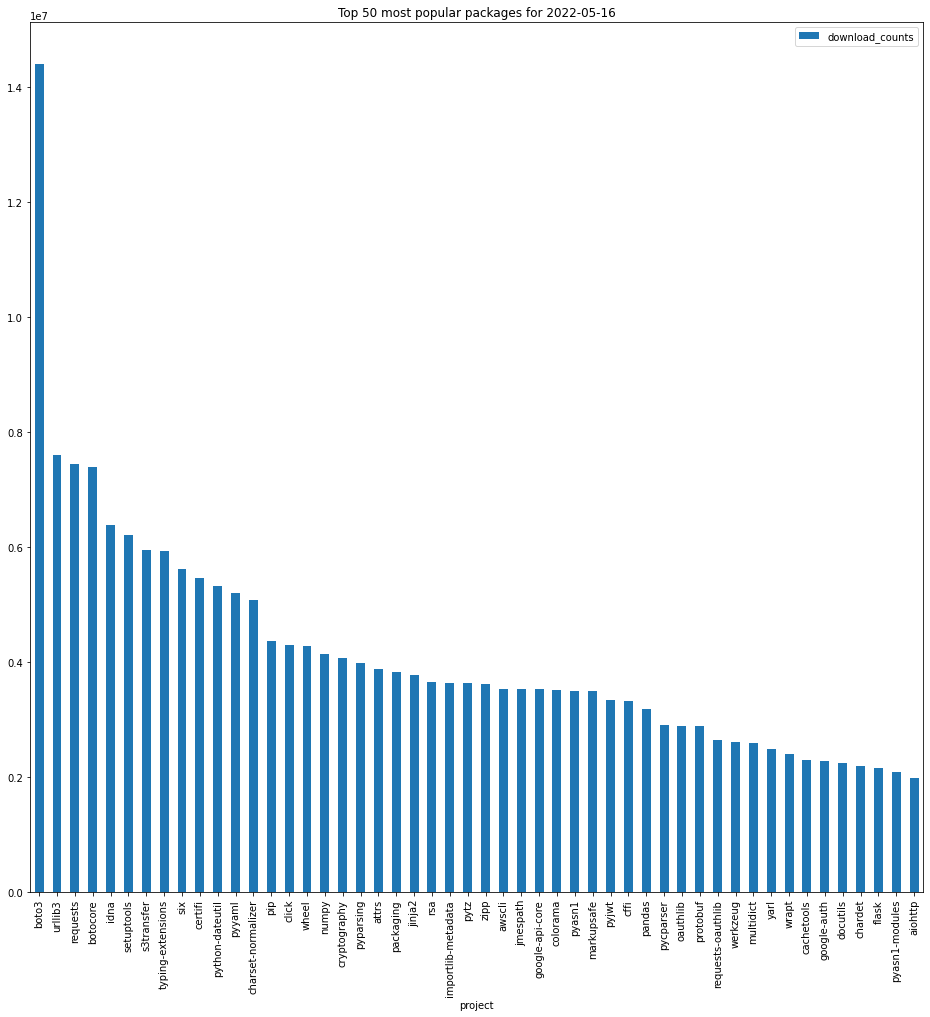

In [10]:
# Let's plot the top downloads of top 50 packages
from datetime import date
packages_today.head(50).plot.bar(x="project", figsize=(16,16), title=f"Top 50 most popular packages for {date.today()}")

# Package Case Study (numpy).

Now that we know how to exectue a basic query against the PyPI dataset we can now perform an in-depth analysis on one of the packages.

For this case study, I will be choosing numpy from amongst the top 50 most downloaded packages today. We will be looking at trends for the past month.

Here are some questions we can potentially answer with this dataset(I'm only exploring a subset):
1. What was the most downloaded file(e.g. wheel, sdist) for that package?
   a. If wheels are provided, which wheels are being downloaded the most?
      b. If wheels are provided and a user chooses to install a sdist, why? 
      (Look into platforms people installing sdists on and see if some people are forced to install sdist due to being on an unsupported platform)
2. What platforms(Linux, macOS, Windows)/Python versions are there the most downloads for? 
3. What times do people most frequently download Python packages on a given day? How do holidays affect download frequencies?
4. Who(on which platforms/python versions) and how many people install pre-releases?
5. How long does it take for a new version of a package to be adopted(become the most freuqently downloaded version)?


Answering these questions can provide insight not just to curious users, but also to maintainers on questions such as "When should I drop support for a specific Python version?", "Is it worth it to provide support for a new kind of wheel?", "When should I release a package?", etc. 

In [11]:
query = """
        -- Sometimes we can't figure out the version, platform tags, etc. from the filename.
        -- This happens when we don't have a wheel or sdist(any file that doesn't end in .tar.gz, .zip, or .whl)
        -- We need to pull info from the table manually in that case.
        SELECT 
            CASE
                WHEN REGEXP_CONTAINS (file.filename, r'^.*\.(tar.gz|zip|whl)') 
                THEN file.filename 
                ELSE CONCAT(file.filename, ' ', file.version, ' ', file.type)
            END
                AS file
            
            
        FROM `bigquery-public-data.pypi.file_downloads`
        WHERE project = '{projectname}'
        AND DATE(timestamp)
            BETWEEN DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)
            AND CURRENT_DATE()
        """
projectname = "numpy"
query = query.format(projectname=projectname)
print("The formatted query is: \n" + query)

# Dry runs are way off for this dataset for some reason
# I ran these queries and the usage reported by the console
# is way lower ~ 1GB not 60GB ...
test_query_job = client.query(query, job_config=job_config) # Dry run
print(test_query_job.total_bytes_processed)

The formatted query is: 

        -- Sometimes we can't figure out the version, platform tags, etc. from the filename.
        -- This happens when we don't have a wheel or sdist(any file that doesn't end in .tar.gz, .zip, or .whl)
        -- We need to pull info from the table manually in that case.
        SELECT 
            CASE
                WHEN REGEXP_CONTAINS (file.filename, r'^.*\.(tar.gz|zip|whl)') 
                THEN file.filename 
                ELSE CONCAT(file.filename, ' ', file.version, ' ', file.type)
            END
                AS file
            
            
        FROM `bigquery-public-data.pypi.file_downloads`
        WHERE project = 'numpy'
        AND DATE(timestamp)
            BETWEEN DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)
            AND CURRENT_DATE()
        
76991093316


For this example, we will only be extracting the filename(when it is a wheel or sdist). 
This is because the filename of uploaded files to a file generally contains information about platforms/Python versions it can be installed on.

Read more about this here : https://packaging.python.org/en/latest/specifications/binary-distribution-format/#file-format( for wheels) and
https://packaging.python.org/en/latest/specifications/source-distribution-format/#source-distribution-file-format (for source distributions)

Although this will require us to do a little extra post-processing of the data, it cuts down on our BigQuery usage by ~ 1/3.

We will use the packaging package(comes with pip) to help use do this.

In [12]:
from packaging.utils import parse_wheel_filename, parse_sdist_filename, InvalidWheelFilename, InvalidSdistFilename, Version

def parse_filename(file):
    name, version, build, tags, ftype = None, None, None, None, None
    try:
        name, version, build, tags = parse_wheel_filename(file)
        ftype = "wheel"
    except InvalidWheelFilename:
        try:
            # No build number or tags on sdist on sdists
            name, version = parse_sdist_filename(file)
            ftype = "sdist"
        except InvalidSdistFilename:
            # Some weird people like to download old packages for EOL Pythons I guess...
            # We just need to extract info we pulled from the GBQ table here
            name, version, ftype = file.split(" ")
            version = Version(version)
            
            
    return pd.Series([name, version, build, tags, ftype])

def get_tags(tags):
    interpreters = set()
    abis = set()
    platforms = set()
    if tags is not None:
        for tag in list(tags):
            interpreters.add(tag.interpreter)
            abis.add(tag.abi)
            platforms.add(tag.platform)
    
    interpreters = frozenset(interpreters)
    abis = frozenset(abis)
    platforms = frozenset(platforms)
        
    return pd.Series([interpreters, abis, platforms])

In [13]:
# Actually run the query
actual_query_job = client.query(query)
project_stats = actual_query_job.to_dataframe()
print(f"Used {actual_query_job.total_bytes_processed} bytes")

# Get value counts
project_stats = project_stats.value_counts().to_frame().reset_index()
project_stats = project_stats.rename({0: "download_count"}, axis="columns")

# Parse filenames
project_stats[["name", "version", "build_number", "tags", "ftype"]] = project_stats["file"].apply(parse_filename)
# Expand tags column, each tag is composed of (python tag, abi tag, platform tag)
# This triplet tells us which platform(Windows, macOS, linux x86_64, etc.), and Python version/type a wheel can be installed for
project_stats[["pytag", "abitag", "platformtag"]] = project_stats["tags"].apply(get_tags)
project_stats = project_stats.drop("tags", axis=1)

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


Used 728033934 bytes


In [14]:
project_stats

,file,download_count,name,version,build_number,ftype,pytag,abitag,platformtag
0,numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64....,1343393,numpy,1.21.6,(),wheel,(cp37),(cp37m),"(manylinux_2_12_x86_64, manylinux2010_x86_64)"
1,numpy-1.22.3-cp38-cp38-manylinux_2_17_x86_64.m...,604916,numpy,1.22.3,(),wheel,(cp38),(cp38),"(manylinux_2_17_x86_64, manylinux2014_x86_64)"
2,numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl,602944,numpy,1.19.5,(),wheel,(cp36),(cp36m),(manylinux2010_x86_64)
3,numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.m...,377124,numpy,1.22.3,(),wheel,(cp39),(cp39),"(manylinux_2_17_x86_64, manylinux2014_x86_64)"
4,numpy-1.18.5-cp35-cp35m-manylinux1_x86_64.whl,217057,numpy,1.18.5,(),wheel,(cp35),(cp35m),(manylinux1_x86_64)
...,...,...,...,...,...,...,...,...,...
1656,numpy-1.13.1-cp34-none-win_amd64.whl,1,numpy,1.13.1,(),wheel,(cp34),(none),(win_amd64)
1657,numpy-1.14.5-cp27-cp27mu-manylinux1_i686.whl,1,numpy,1.14.5,(),wheel,(cp27),(cp27mu),(manylinux1_i686)
1658,numpy-1.13.1-cp35-cp35m-manylinux1_i686.whl,1,numpy,1.13.1,(),wheel,(cp35),(cp35m),(manylinux1_i686)
1659,numpy-1.16.0rc1-cp35-cp35m-macosx_10_6_intel.m...,1,numpy,1.16.0rc1,(),wheel,(cp35),(cp35m),"(macosx_10_10_intel, macosx_10_9_x86_64, macos..."


Answering Question 1:

What was the most downloaded file(e.g. wheel, sdist) for that package?

   a. If wheels are provided, which wheels are being downloaded the most?

   b. If wheels are provided and a user chooses to install a sdist, why? 
      (Look into platforms people installing sdists on and see if some people are forced to install sdist due to being on an unsupported platform)

<AxesSubplot:>

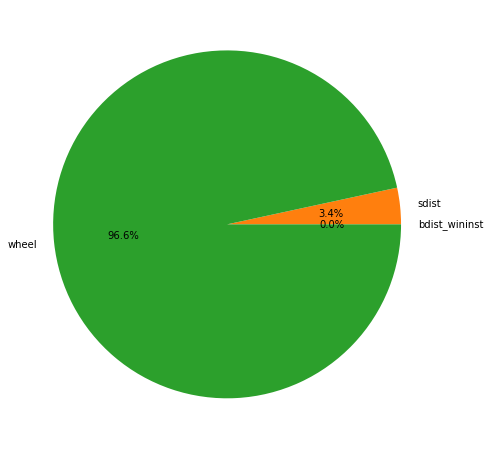

In [15]:
# Wheel vs sdist download percentage
grouped_stats = project_stats.groupby("ftype")
grouped_stats["download_count"].sum().plot.pie(autopct="%1.1f%%", figsize=(8,8), label="")

Pretty good! Looks like most users are seeing the compile time savings from wheels for the numpy project.

Now let's see which platforms have installed the most wheels.

In [16]:
# Most popular platform for wheels
wheels_info = grouped_stats.get_group("wheel")
plat_download_counts = wheels_info.groupby("platformtag")["download_count"].sum()
plat_download_counts = plat_download_counts / plat_download_counts.sum()
plat_download_counts = plat_download_counts.sort_values(ascending=False)

<AxesSubplot:ylabel='platformtag'>

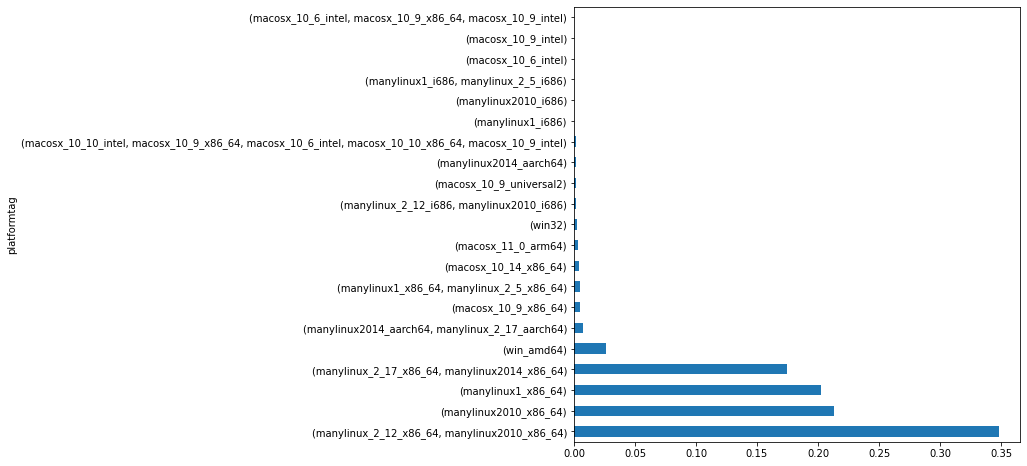

In [17]:
plat_download_counts.plot.barh(figsize=(8,8))

While this does shed some light on the most popular platforms that wheels are downloaded on
(It appears Linux > Windows > MacOS), we can do better.

Lets narrow in on one release and look at the plot download percentages for the wheel corresponding
to each platform.

In [18]:
from packaging.version import Version
release = Version("1.22.3")
rel_plat_download_info = wheels_info[wheels_info["version"] == release].groupby("platformtag")["download_count"].sum()
rel_plat_download_info = rel_plat_download_info / rel_plat_download_info.sum()
rel_plat_download_info = rel_plat_download_info.sort_values(ascending=False)

<AxesSubplot:ylabel='platformtag'>

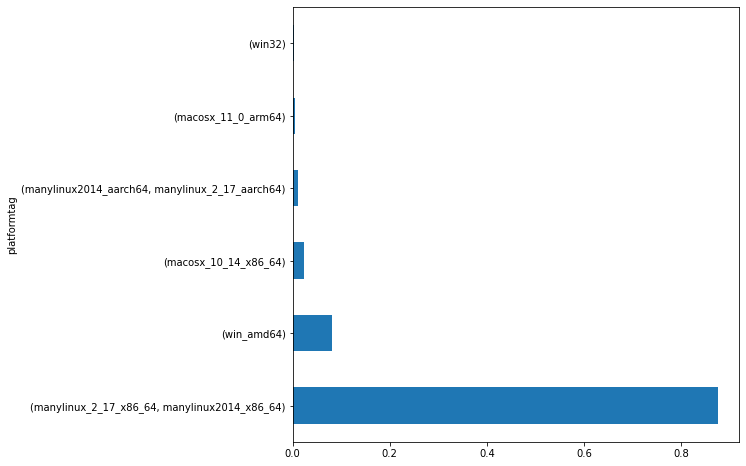

In [19]:
rel_plat_download_info.plot.barh(figsize=(8,8))

<AxesSubplot:>

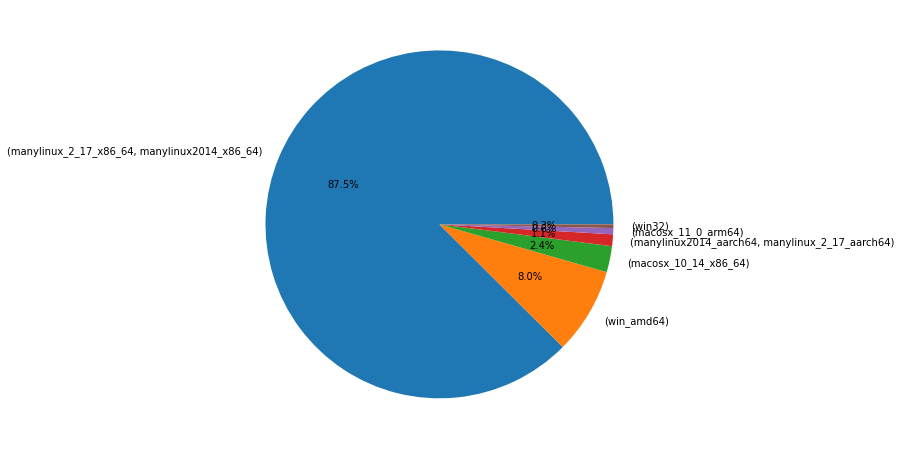

In [20]:
rel_plat_download_info.plot.pie(autopct="%1.1f%%", figsize=(8,8), label="")

From this we can see Linux x86_64 in the lead, with Windows and MacOS x86_64 trailing it. 
We also see barely used platforms like win32, whose wheels can probably be dropped.

Now, let's look at the distribution of downloaded versions. 

In [21]:
grouped_version_stats = project_stats.groupby('version')
summed_version_stats = grouped_version_stats["download_count"].sum().sort_values(ascending=False)

<AxesSubplot:>

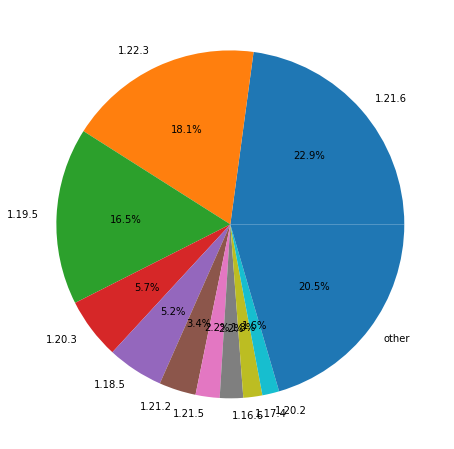

In [22]:
top10_versions = summed_version_stats.head(10)
top10_versions["other"] = summed_version_stats.iloc[10:].sum()
top10_versions.plot.pie(autopct="%1.1f%%", figsize=(8,8), label="")

Here, we see most people are not installing the latest version, indicating that people (or the dependencies they are using) are most likely pinning numpy. 

Now let's see how many people download the rc versions of numpy compared to actual releases.

In [23]:
analysis_version = "1.22"
latest_ver_data = project_stats[project_stats["version"].apply(lambda x: analysis_version in x.base_version)]
prerelease_count = len(latest_ver_data[latest_ver_data["version"].apply(lambda x: x.is_prerelease)])
print(f"{prerelease_count} users out of {len(latest_ver_data)} installed a prerelease version today.")

19 users out of 101 installed a prerelease version today.


In [24]:
latest_ver_data

,file,download_count,name,version,build_number,ftype,pytag,abitag,platformtag
1,numpy-1.22.3-cp38-cp38-manylinux_2_17_x86_64.m...,604916,numpy,1.22.3,(),wheel,(cp38),(cp38),"(manylinux_2_17_x86_64, manylinux2014_x86_64)"
3,numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.m...,377124,numpy,1.22.3,(),wheel,(cp39),(cp39),"(manylinux_2_17_x86_64, manylinux2014_x86_64)"
15,numpy-1.22.3-cp310-cp310-manylinux_2_17_x86_64...,76528,numpy,1.22.3,(),wheel,(cp310),(cp310),"(manylinux_2_17_x86_64, manylinux2014_x86_64)"
25,numpy-1.22.3-cp310-cp310-win_amd64.whl,41864,numpy,1.22.3,(),wheel,(cp310),(cp310),(win_amd64)
28,numpy-1.22.3.zip,37604,numpy,1.22.3,None,sdist,(),(),()
...,...,...,...,...,...,...,...,...,...
1280,numpy-1.22.0rc1-cp39-cp39-win_amd64.whl,1,numpy,1.22.0rc1,(),wheel,(cp39),(cp39),(win_amd64)
1284,numpy-1.22.0rc1-cp38-cp38-macosx_11_0_arm64.whl,1,numpy,1.22.0rc1,(),wheel,(cp38),(cp38),(macosx_11_0_arm64)
1285,numpy-1.22.0rc1-cp310-cp310-win_amd64.whl,1,numpy,1.22.0rc1,(),wheel,(cp310),(cp310),(win_amd64)
1288,numpy-1.22.0-cp310-cp310-macosx_10_9_universal...,1,numpy,1.22.0,(),wheel,(cp310),(cp310),(macosx_10_9_universal2)


Now, let's see which platforms people are installing the sdists on. 

In [25]:
query = """
        SELECT
            file.version,
            details.system.name AS systemname,
            details.system.release AS systemversion,
            details.distro.name AS distroname,
            details.distro.version AS distroversion,
            details.distro.libc AS distrolibc,
            details.python AS python
        FROM `bigquery-public-data.pypi.file_downloads`
        WHERE project = '{projectname}'
        AND DATE(timestamp)
            BETWEEN DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)
            AND CURRENT_DATE()
        AND details.system IS NOT NULL
        AND details.distro IS NOT NULL
        AND details.python IS NOT NULL
        AND file.type = 'sdist'
"""
print("The formatted query is: \n" + query)
query = query.format(projectname=projectname)
test_query = client.query(query, job_config=job_config) # Dry run
test_query.total_bytes_processed

The formatted query is: 

        SELECT
            file.version,
            details.system.name AS systemname,
            details.system.release AS systemversion,
            details.distro.name AS distroname,
            details.distro.version AS distroversion,
            details.distro.libc AS distrolibc,
            details.python AS python
        FROM `bigquery-public-data.pypi.file_downloads`
        WHERE project = '{projectname}'
        AND DATE(timestamp)
            BETWEEN DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)
            AND CURRENT_DATE()
        AND details.system IS NOT NULL
        AND details.distro IS NOT NULL
        AND details.python IS NOT NULL
        AND file.type = 'sdist'



93810038511

In [26]:
actual_query_job = client.query(query)
sdist_plats = actual_query_job.to_dataframe()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


In [27]:
sdist_plats

,version,systemname,systemversion,distroname,distroversion,distrolibc,python
0,1.22.3,Darwin,15.6.0,macOS,10.11.6,None,3.10.4
1,1.22.3,Darwin,17.7.0,macOS,10.13.6,None,3.8.1
2,1.22.3,Darwin,17.7.0,macOS,10.13.6,None,3.10.4
3,1.22.3,Darwin,17.7.0,macOS,10.13.6,None,3.10.4
4,1.17.3,Darwin,18.7.0,macOS,10.14.6,None,3.9.6
...,...,...,...,...,...,...,...
103132,1.19.3,Linux,5.10.52-lts-5.10.y+g2075623d65fb,NXP i.MX Release Distro,5.10-hardknott,"{'lib': 'glibc', 'version': '2.33'}",3.9.5
103133,1.21.6,Linux,5.17.0-1-amd64,Debian GNU/Linux,testing,"{'lib': 'glibc', 'version': '2.33'}",3.8.13
103134,1.22.3,Linux,4.18.0-372.el8.s390x,Ubuntu,21.04,"{'lib': 'glibc', 'version': '2.33'}",3.9.5
103135,1.22.3,Linux,5.4.83-Re4son-v7l+,Kali GNU/Linux,2022.2,"{'lib': 'glibc', 'version': '2.33'}",3.10.4


In [28]:
# Analysis time
# Use the latest version to guide our analysis
analysis_version = "1.22.3"
sdist_plats_latest = sdist_plats[sdist_plats["version"] == analysis_version].reset_index(drop=True)

In [29]:
# Filter out people installing on invalid Pythons (numpy 1.22.x supports Python 3.8+ only)
from packaging import version
# can't compare version numbers directly as strings, use packaging to help
sdist_plats_latest["python"] = sdist_plats_latest["python"].apply(version.parse)
min_supported_python = version.parse("3.8")
valid_sdist_plats_latest = sdist_plats_latest[sdist_plats_latest["python"]>=min_supported_python]
print(f"There were {len(sdist_plats_latest)-len(valid_sdist_plats_latest)} downloads with Python versions less than the min supported version.")

There were 1667 downloads with Python versions less than the min supported version.


In [30]:
valid_sdist_groups = valid_sdist_plats_latest.groupby("distroname")
sdist_plats_dl_counts = valid_sdist_groups.size().sort_values(ascending=False)
top5_sdist_plats = sdist_plats_dl_counts.head(5)
top5_sdist_plats.loc["other"] = sdist_plats_dl_counts.iloc[5:].sum()

In [31]:
top5_sdist_plats

distroname
Ubuntu              2311
Alpine Linux        2222
macOS               1588
CentOS               582
Debian GNU/Linux     324
other                465
dtype: int64

<AxesSubplot:>

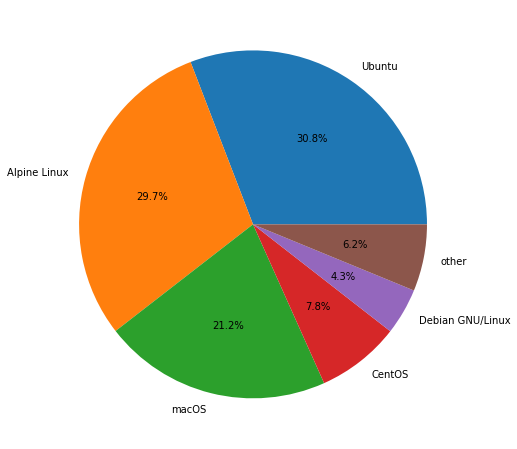

In [32]:
top5_sdist_plats.plot.pie(autopct="%1.1f%%", figsize=(8,8), label="")

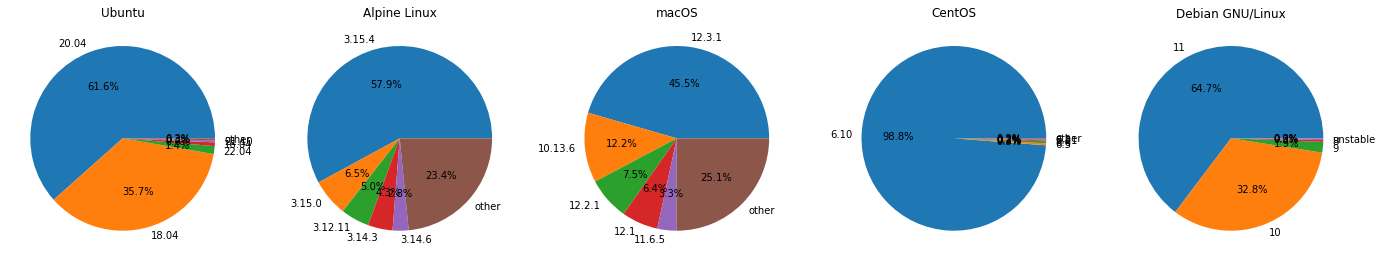

In [33]:
# Let's look at deeper look by looking at the versions of these
# platforms without wheels
top5_sdist_plats = top5_sdist_plats.drop("other") # TODO: This is spaghetti, clean it up
figure, axis = plt.subplots(1, len(top5_sdist_plats), figsize=(24, 24))
for i, platform in enumerate(top5_sdist_plats.index):
    plat_distroversions = valid_sdist_groups.get_group(platform).groupby("distroversion").size().sort_values(ascending=False)
    top5_plat_distroversions = plat_distroversions.head(5)
    top5_plat_distroversions.loc["other"] = plat_distroversions.iloc[5:].sum()
    top5_plat_distroversions.plot.pie(ax=axis[i], autopct="%1.1f%%", title=platform, label="")

Looking at these two graphs, we can see that CentOS is not a problem as Centos 6 is EOL, so it doesn't make sense to have wheels for them.
Alpine Linux also looks like a good distribution for numpy to provide wheels for in the form of musllinux wheels.

Users of the rest of the distributions should be installing wheels. It is most likely that these people chose to manually install from the sdist.